<a href="https://colab.research.google.com/github/Magnetic-Gravity/Linear_Regression/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_california_housing
house = fetch_california_housing()

In [ ]:
house

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
import pandas as pd
#Independent Data
X = pd.DataFrame(house.data, columns=house.feature_names)

In [ ]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
#Dependent data
y=house.target

In [ ]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [ ]:
X.shape, y.shape

((20640, 8), (20640,))

In [ ]:
#check null values in input features
X.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0


In [ ]:
#check null values in target
pd.isnull(y).sum()

np.int64(0)

In [ ]:
from sklearn.model_selection import train_test_split, learning_curve
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (16512, 8)
X_test shape: (4128, 8)
y_train shape: (16512,)
y_test shape: (4128,)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([ 4.48674910e-01,  9.72425752e-03, -1.23323343e-01,  7.83144907e-01,
       -2.02962058e-06, -3.52631849e-03, -4.19792487e-01, -4.33708065e-01])

In [ ]:
model.intercept_

np.float64(-37.02327770606409)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("MSE :", mean_squared_error(y_test, y_pred))
print("R2 :", r2_score(y_test, y_pred))

MSE : 0.5558915986952444
R2 : 0.5757877060324508


Standardization Using Ridge Lasso ElasticNet

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
import numpy as np
scaler = StandardScaler()

In [ ]:
#Scale Features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Ridge without scaling
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_rid = ridge.predict(X_test)
print("MSE Ridge : ", mean_squared_error(y_test, y_pred_rid))
print("Ridge R2 (no scaling):", r2_score(y_test, y_pred_rid))

MSE Ridge :  0.5558034669932211
Ridge R2 (no scaling): 0.5758549611440126


In [ ]:
#Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
print("MSE Ridge : ", mean_squared_error(y_test, y_pred_ridge))
print("R2_score : ", r2_score(y_test, y_pred_ridge))

MSE Ridge :  0.5558548589435971
R2_score :  0.5758157428913684


In [ ]:
# Lasso without scaling
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_laso = lasso.predict(X_test)
print("Lasso R2 (no scaling):", r2_score(y_test, y_pred_laso))
print("MSE Ridge : ", mean_squared_error(y_test, y_pred_laso))

Lasso R2 (no scaling): 0.5318167610318159
MSE Ridge :  0.6135115198058131


In [ ]:
#Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
print("MSE Ridge : ", mean_squared_error(y_test, y_pred_lasso))
print("R2_score : ", r2_score(y_test, y_pred_lasso))

MSE Ridge :  0.6796290284328825
R2_score :  0.48136113250290735


In [ ]:
# Elastic Net without scaling
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(X_train, y_train)
y_pred_elstic = elastic.predict(X_test)
print("MSE Ridge : ", mean_squared_error(y_test, y_pred_elstic))
print("Elastic Net R2 (no scaling):", r2_score(y_test, y_pred_elstic))

MSE Ridge :  0.5730994198028206
Elastic Net R2 (no scaling): 0.5626560643897964


In [ ]:
#Elastic Net Regression
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train_scaled, y_train)
y_pred_elastic_net = elastic_net.predict(X_test_scaled)
print("MSE Ridge : ", mean_squared_error(y_test, y_pred_elastic_net))
print("R2_score : ", r2_score(y_test, y_pred_elastic_net))

MSE Ridge :  0.6358566879910782
R2_score :  0.5147647043408876


Linear Regression using a single pipeline approach where you can switch with/without StandardScaler easily and test different alphas for all three models in one go


===== Ridge Regression (Scaled) =====
Alpha: 1.0
R² Score: 0.5758
MSE: 0.5559

===== Lasso Regression (Scaled) =====
Alpha: 0.1
R² Score: 0.4814
MSE: 0.6796

===== ElasticNet Regression (Scaled) =====
Alpha: 0.1
R² Score: 0.5148
MSE: 0.6359


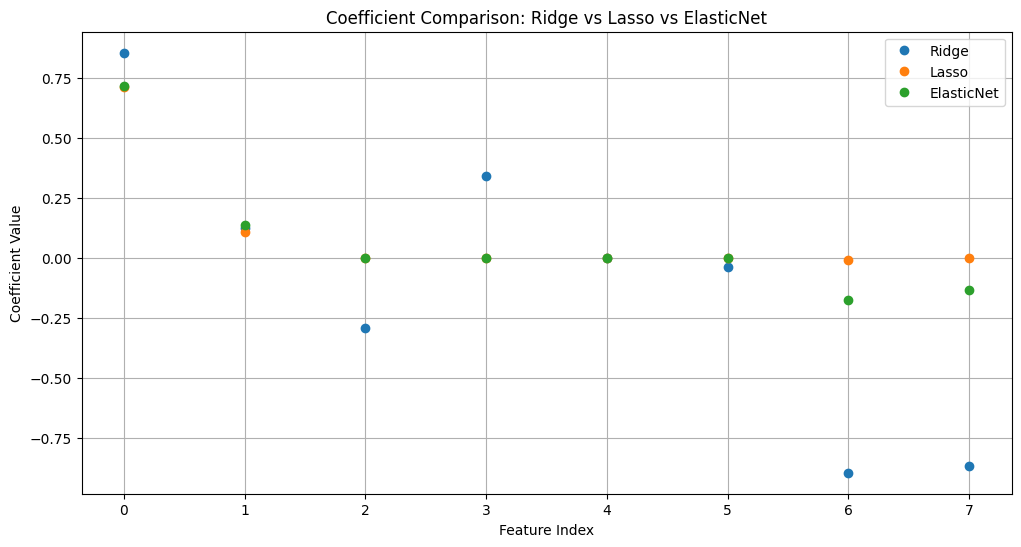

In [5]:
# =============================================
# Ridge, Lasso, ElasticNet with or without Scaling
# =============================================

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
X, y = fetch_california_housing(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models and parameters
models = {
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1, max_iter=10000),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000)
}

# Toggle scaler
use_scaler = True  # Change to False to disable scaling

# Create function to build pipeline
def build_pipeline(model, scale=True):
    steps = []
    if scale:
        steps.append(('scaler', StandardScaler()))
    steps.append(('model', model))
    return Pipeline(steps)

# To store coefficients for plotting
coefficients = {}

# Evaluate all models
for name, model in models.items():
    pipe = build_pipeline(model, scale=use_scaler)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n===== {name} Regression {'(Scaled)' if use_scaler else '(Unscaled)'} =====")
    print(f"Alpha: {model.alpha}")
    print(f"R² Score: {r2:.4f}")
    print(f"MSE: {mse:.4f}")

    # Extract coefficients from pipeline
    coefficients[name] = pipe.named_steps['model'].coef_

# Plot coefficient comparison
plt.figure(figsize=(12,6))
for name, coef in coefficients.items():
    plt.plot(range(len(coef)), coef, 'o', label=name)
plt.title("Coefficient Comparison: Ridge vs Lasso vs ElasticNet")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.legend()
plt.grid(True)
plt.show()
